In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Sample data (replace with your actual data)
data = {
    "Model-Dataset-Name": [
        "ResNet-26-FER-2013",
        "MobileNet-AffectNetHQ+FER2013",
        "ResNet-26-AffectNetHQ+FER2013",
        "ResNet-50-AffectNetHQ+FER2013",
        "MobileNet-Fixed_Labels-AffectNetHQ+FER2013",
    ],
    "Validation Loss": [2.7327, 0.4203, 0.7528, 0.7700, 0.4859],
    "Accuracy": [0.6508, 0.8995, 0.7651, 0.7426, 0.8618],
    "Precision": [0.6494, 0.9009, 0.7691, 0.7466, 0.8638],
    "Recall": [0.6508, 0.8995, 0.7651, 0.7426, 0.8618],
    "F1": [0.6492, 0.9009, 0.7648, 0.7435, 0.8618],
}

df = pd.DataFrame(data)
df.set_index("Model-Dataset-Name", inplace=True)


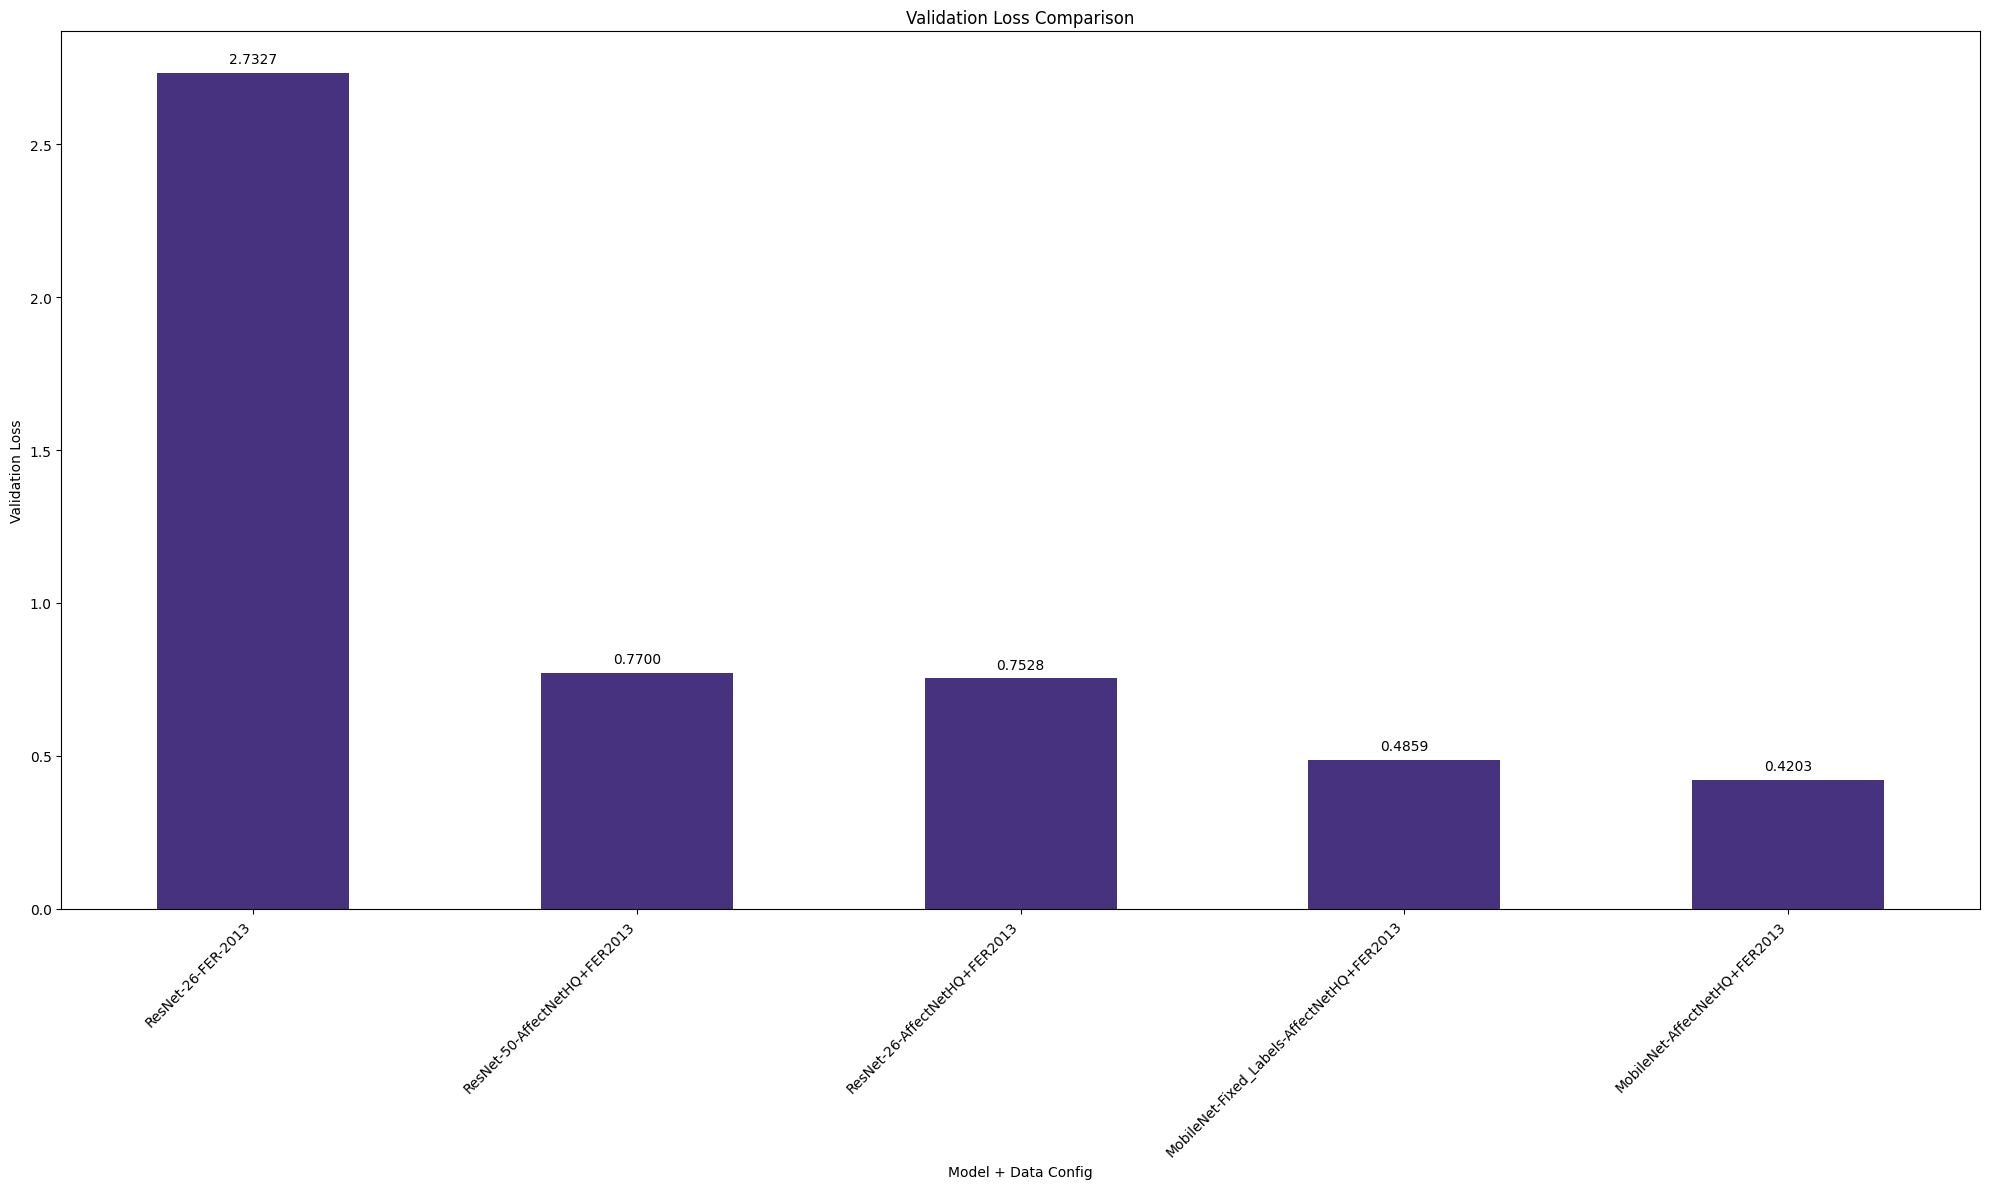

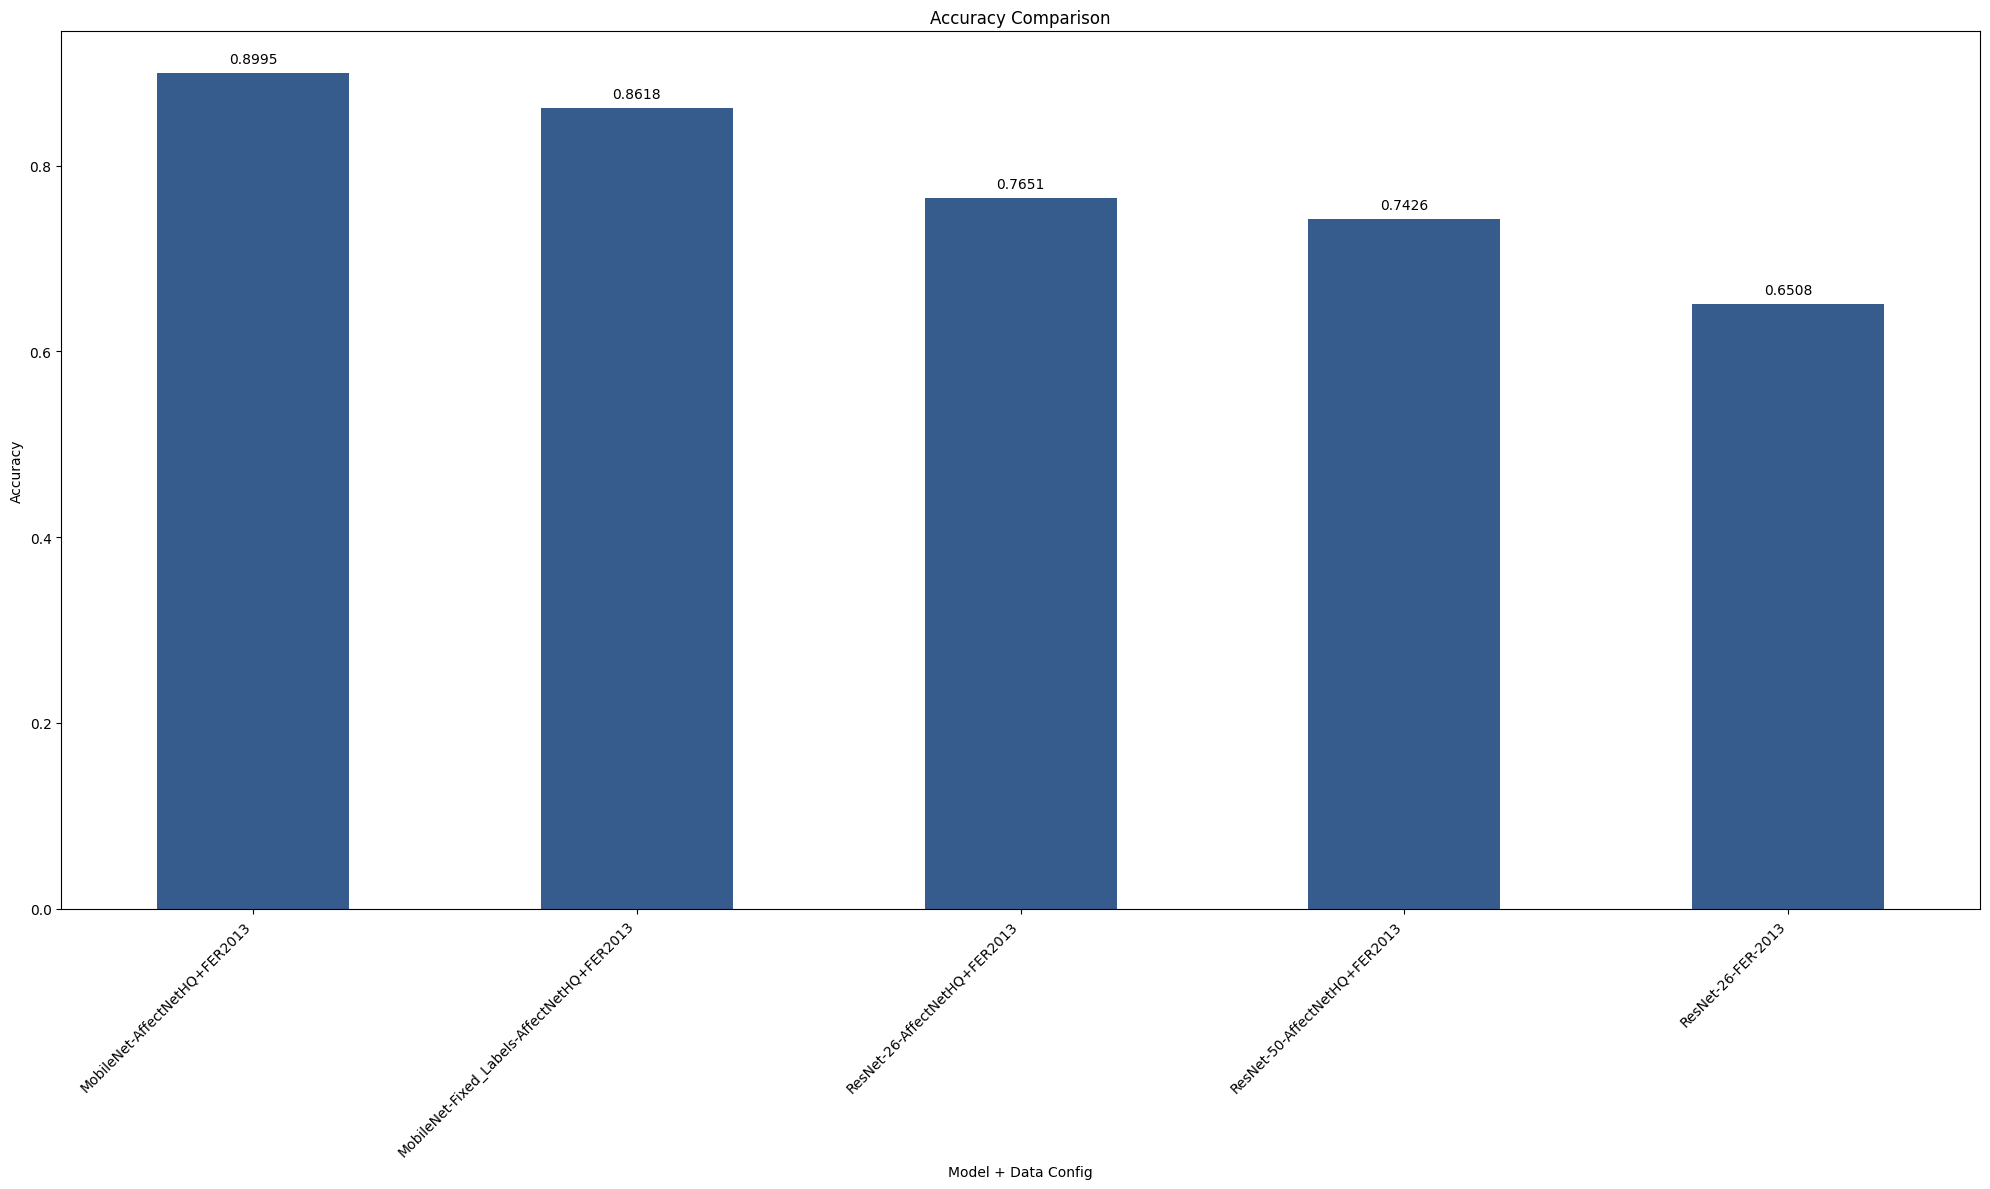

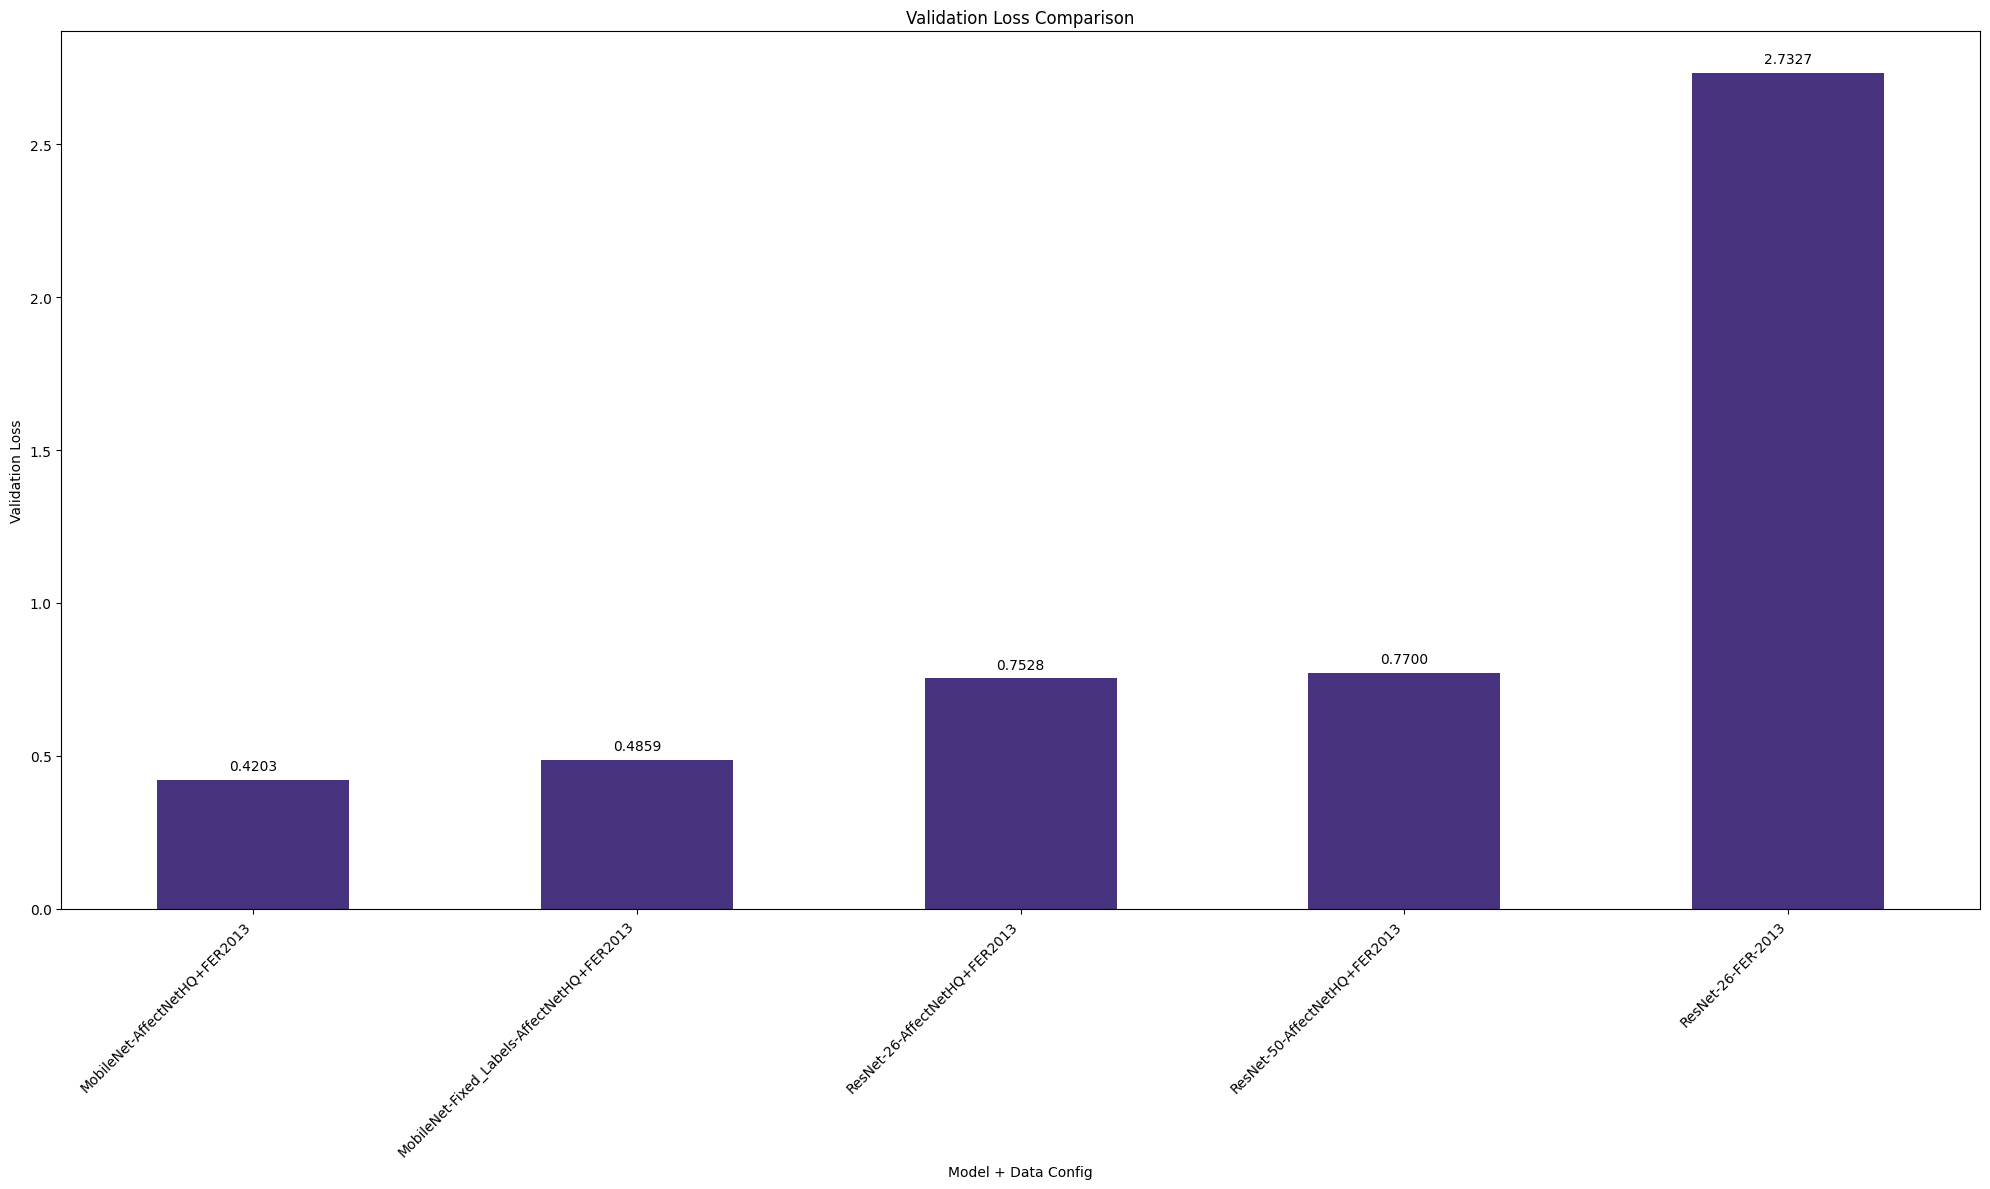

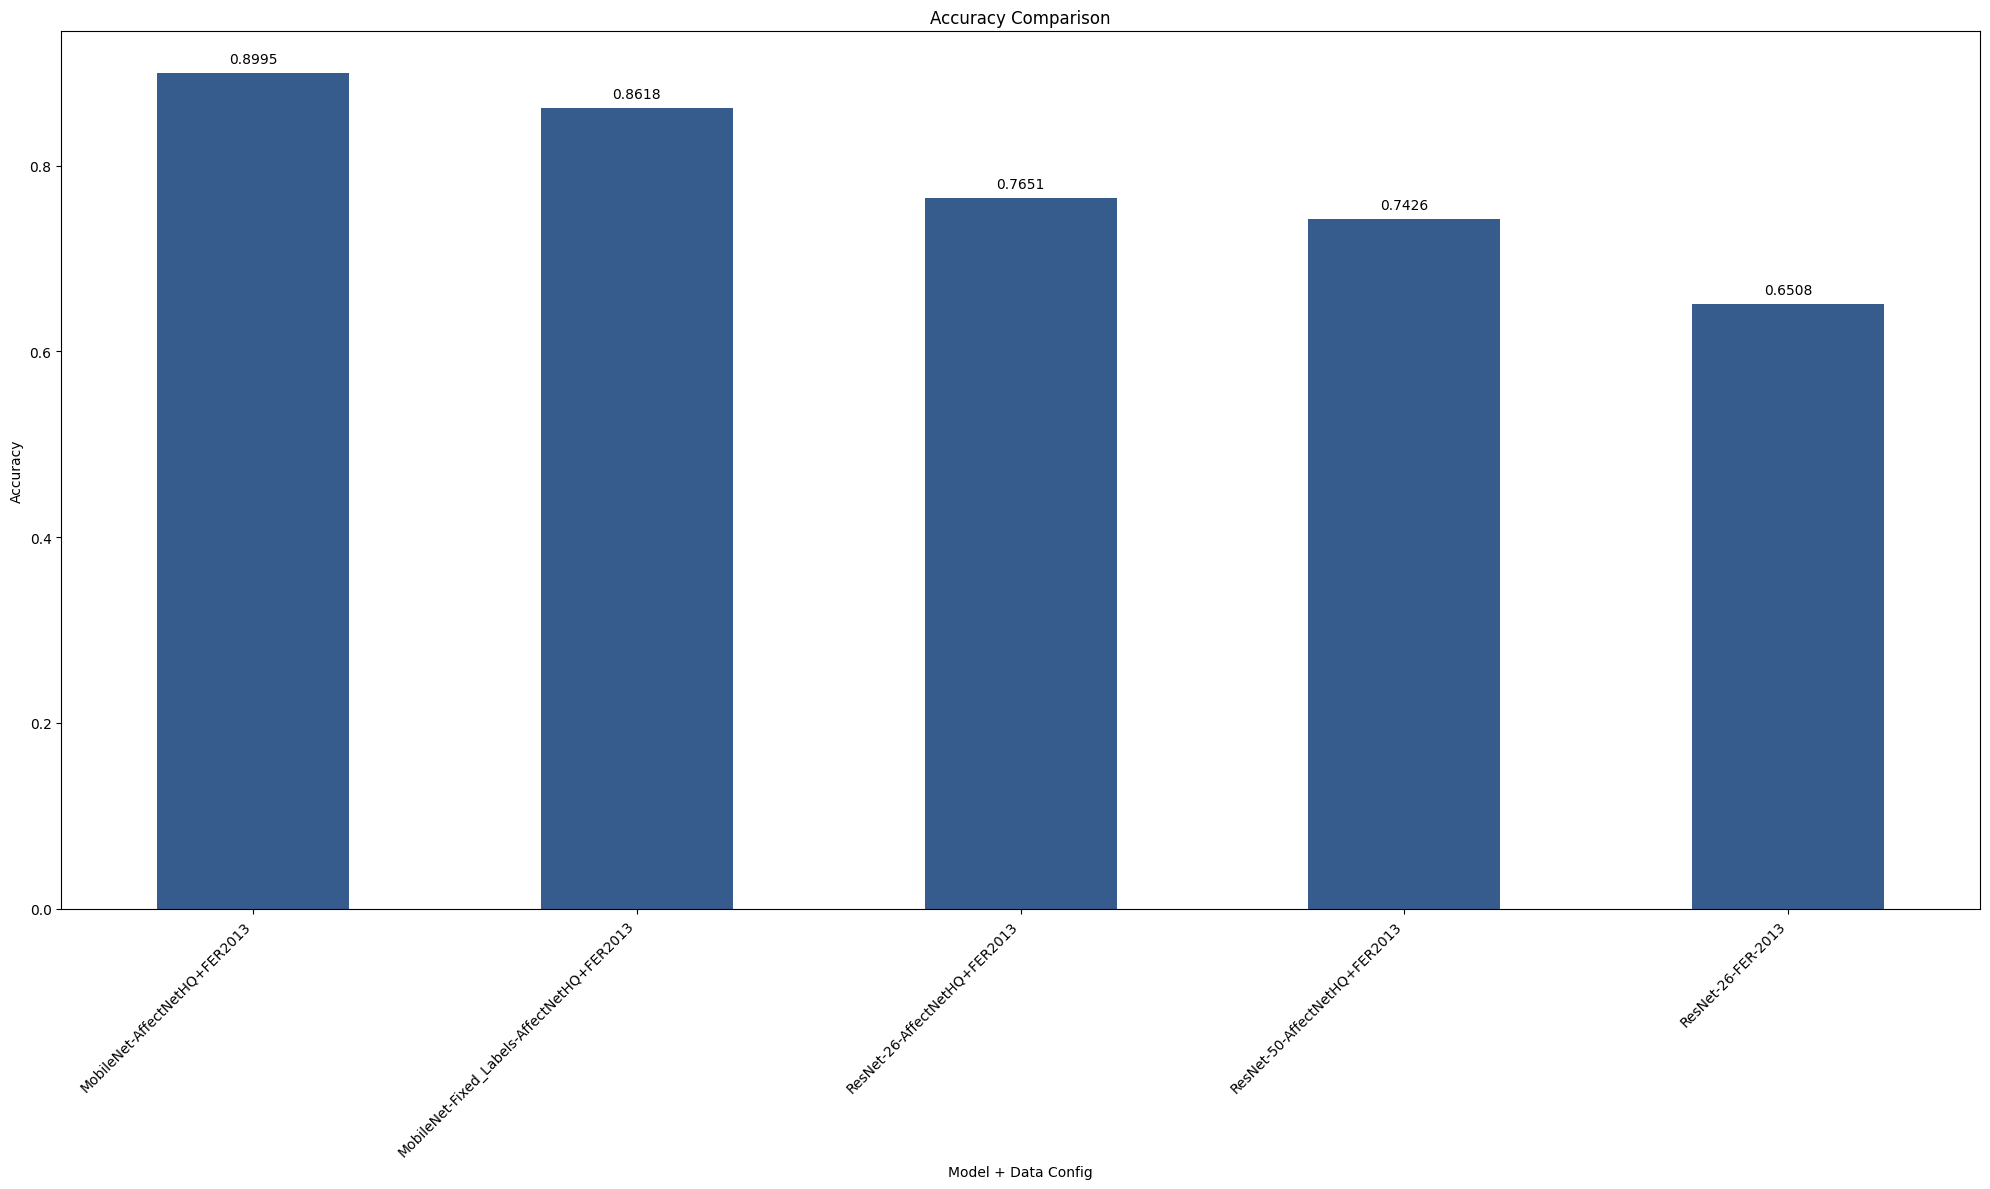

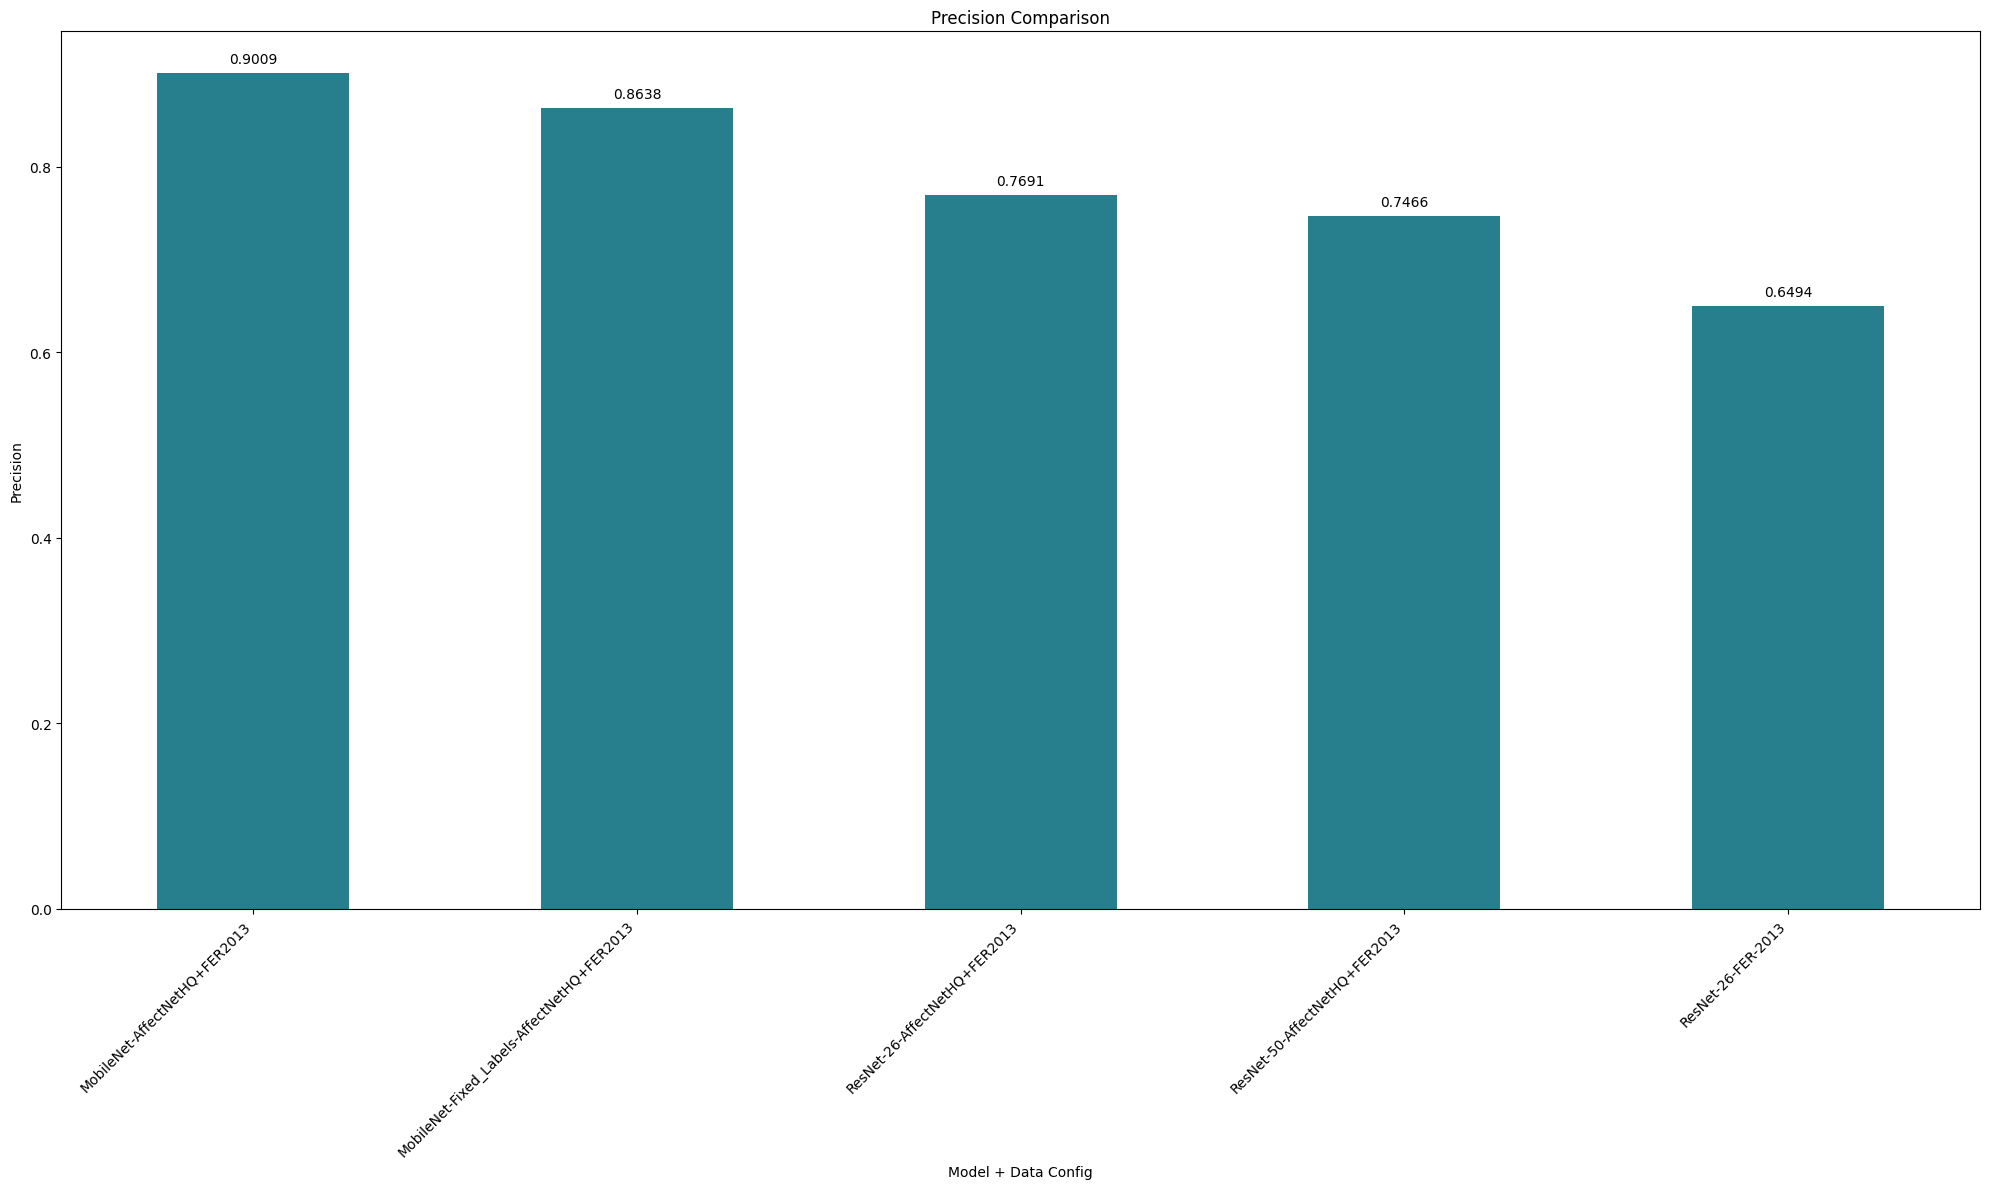

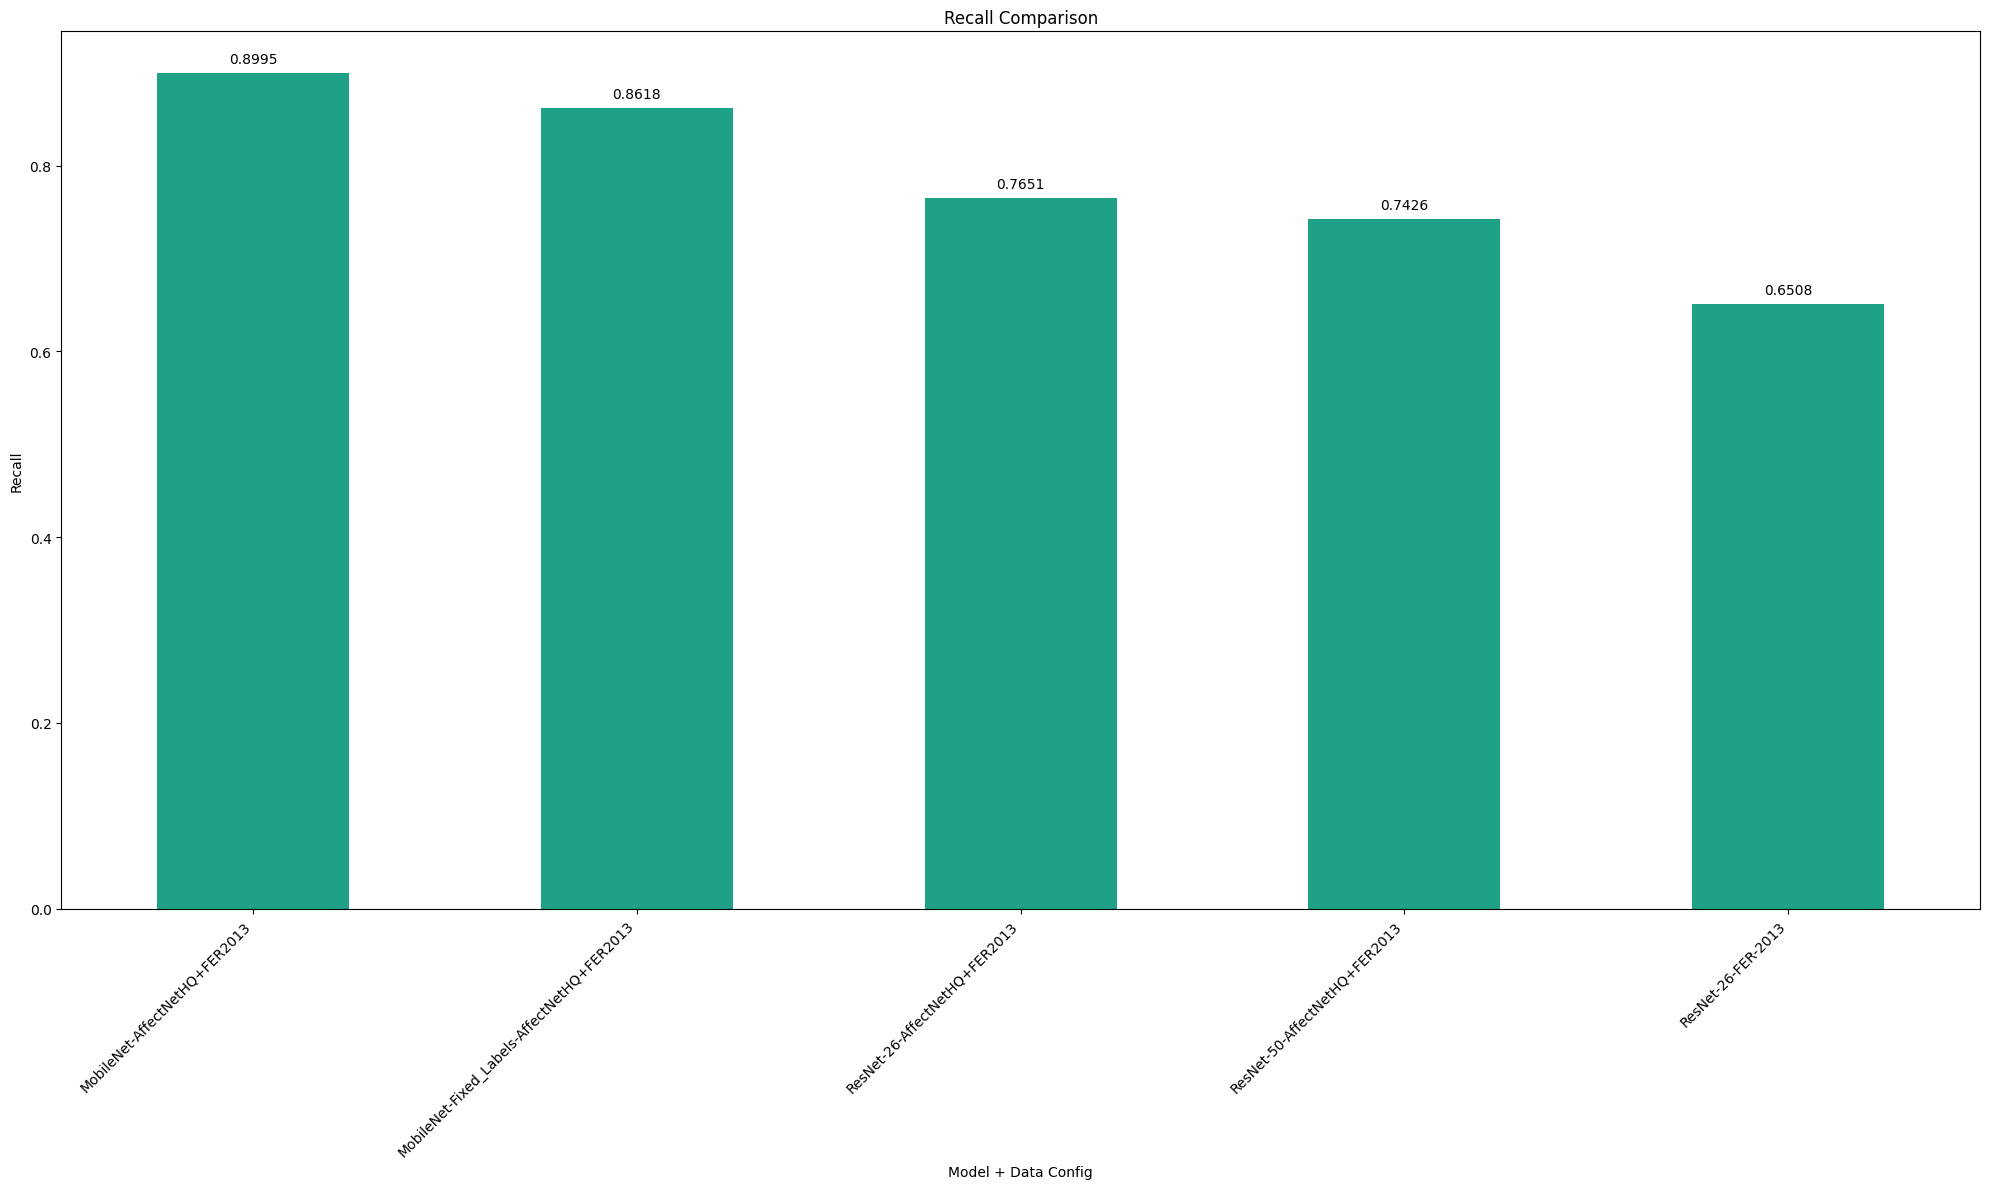

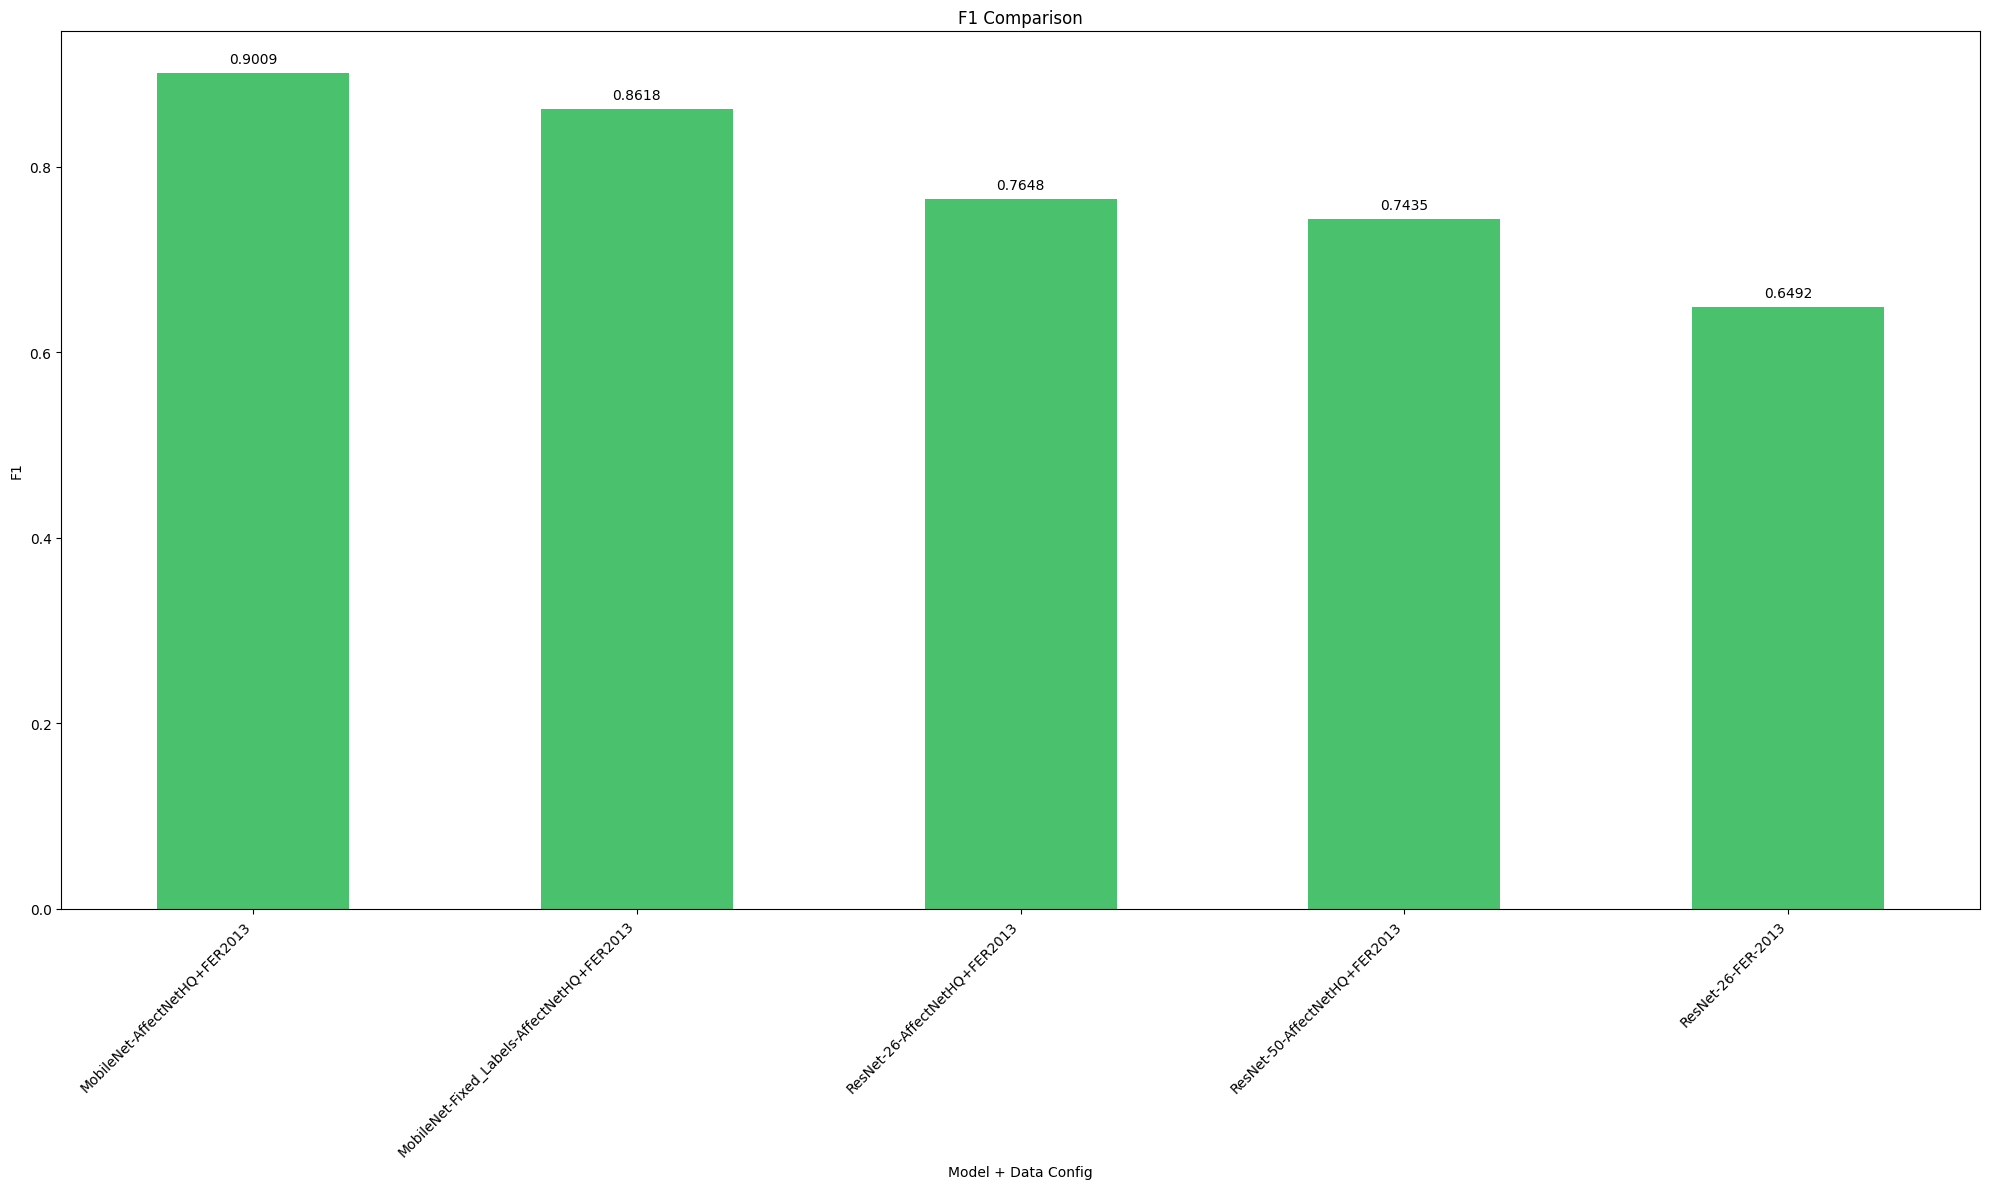

In [22]:
# Define a color palette
colors = sns.color_palette("viridis")

# Function to add value labels on top of bars
def add_value_labels(ax, spacing=5):

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = "bottom"
        if y_value < 0:
            space *= -1
            va = "top"
        label = "{:.4f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha="center",
            va=va,
        )


#Bar chart for Validation Loss
plt.figure(figsize=(20, 12))
ax1 = df["Validation Loss"].sort_values(ascending=False).plot(
    kind="bar", color=colors[0]
)
plt.title("Validation Loss Comparison")
plt.xlabel("Model + Data Config")
plt.ylabel("Validation Loss")
plt.xticks(rotation=45, ha="right")
add_value_labels(ax1)
plt.tight_layout()
plt.savefig("validation_loss_comparison.png")
plt.show()

#Bar chart for Accuracy
plt.figure(figsize=(20, 12))
ax2 = df["Accuracy"].sort_values(ascending=False).plot(kind="bar", color=colors[1])
plt.title("Accuracy Comparison")
plt.xlabel("Model + Data Config")
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha="right")
add_value_labels(ax2)
plt.tight_layout()
plt.savefig("accuracy_comparison.png")
plt.show()

#Individual bar charts for each metric (optional)
for column in df.columns:
    plt.figure(figsize=(20, 12))
    sorted_df = df.sort_values(by=column, ascending=(column == "Validation Loss"))
    ax5 = sorted_df[column].plot(
        kind="bar", color=colors[df.columns.get_loc(column)]
    )
    plt.title(f"{column} Comparison")
    plt.xlabel("Model + Data Config")
    plt.ylabel(column)
    plt.xticks(rotation=45, ha="right")
    add_value_labels(ax5)
    plt.tight_layout()
    plt.savefig(f"{column.lower()}_comparison.png")
    plt.show()